# MLP IRIS DATASET LAB TASK

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [3]:
# Load dataset
df = pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


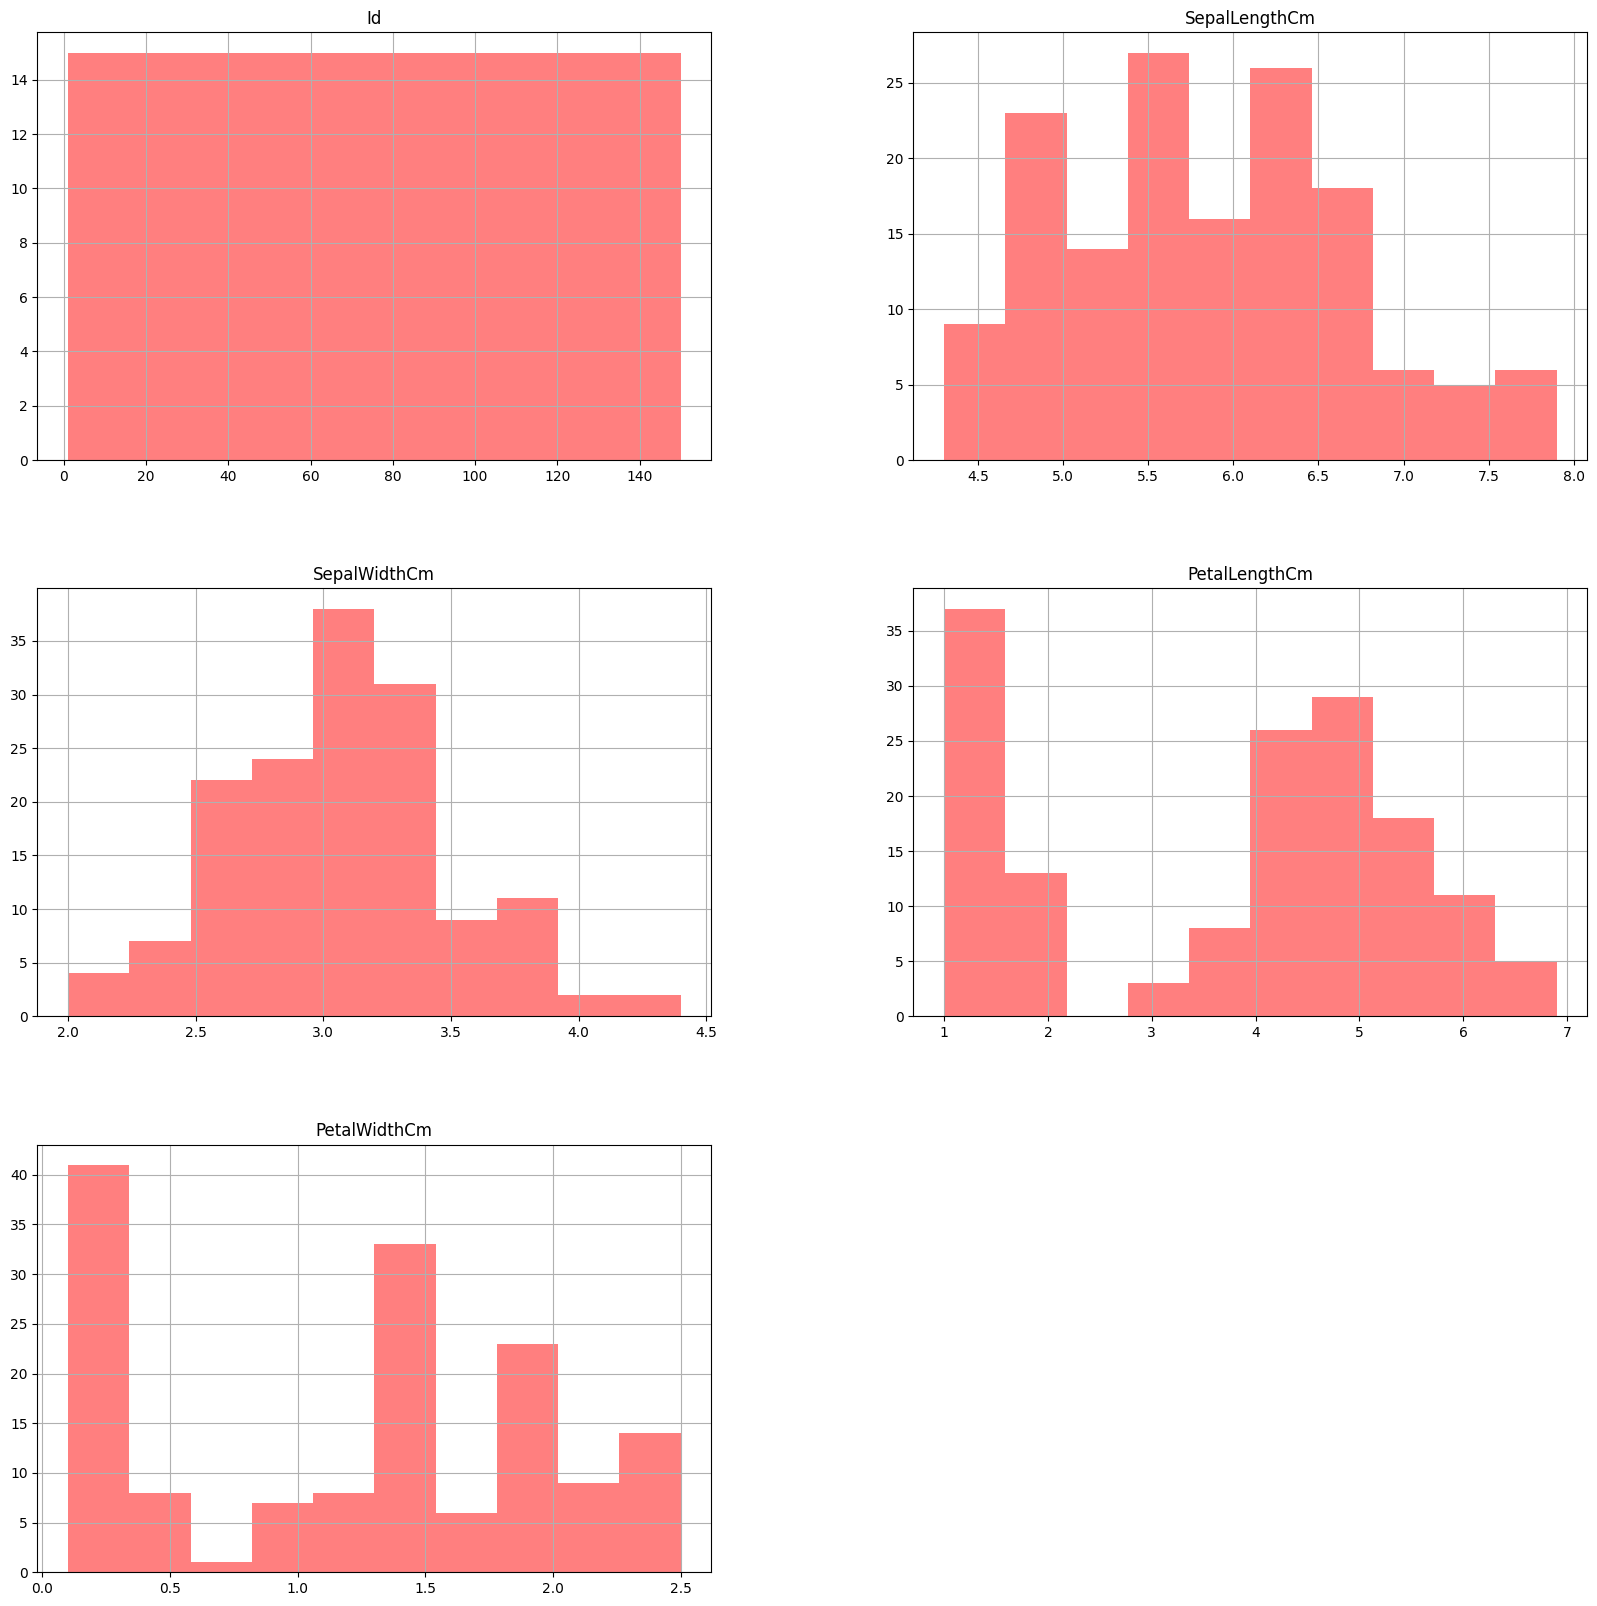

In [5]:
df.hist(alpha=0.5, figsize=(20, 20), color='red')
plt.show()

In [6]:
# Drop 'Id' column (not needed for training)
df = df.drop(columns=["Id"])

# Extract features (X) and labels (y)
X = df.iloc[:, :-1].values  # Features (all except last column)
y = df.iloc[:, -1].values   # Target labels (last column)

I converted categorical labels (flower names) into numeric values using LabelEncoder(). Then, I applied One-Hot Encoding to make them suitable for neural networks.

In [8]:
# Encode class labels into integers (0, 1, 2)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Converts labels to numeric

# Convert labels to One-Hot Encoding
y_categorical = to_categorical(y_encoded, num_classes=3)

I split the dataset into 80% training and 20% testing to evaluate my model properly.

In [10]:
# Split dataset into 80% training and 20% testing
train_X, test_X, train_y, test_y = train_test_split(X, y_categorical, test_size=0.2, random_state=42, stratify=y_categorical)

# Print dataset shapes
print(f"Train X shape: {train_X.shape}, Train y shape: {train_y.shape}")
print(f"Test X shape: {test_X.shape}, Test y shape: {test_y.shape}")

Train X shape: (120, 4), Train y shape: (120, 3)
Test X shape: (30, 4), Test y shape: (30, 3)


I created a Sequential neural network with three layers:

First layer: 10 neurons, ReLU activation (to introduce non-linearity and help learn complex patterns).

Second layer: 8 neurons, ReLU activation (to further refine feature extraction).

Output layer: 3 neurons, Softmax activation (to output probabilities for three classes).

In [12]:
# Define a simple MLP model using Keras
model = Sequential([
    Dense(10, input_shape=(4,), activation='relu'),  # Input layer (4 features)
    Dense(8, activation='relu'),                      # Hidden layer
    Dense(3, activation='softmax')                    # Output layer (3 classes, softmax for classification)
])

C:\Users\munta\tensorflow_env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


I compiled the model using the Adam optimizer and categorical cross-entropy loss because it's a multi-class classification problem.

In [14]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 165 (660.00 B)

 Trainable params: 165 (660.00 B)

 Non-trainable params: 0 (0.00 B)

I trained the model for 20 epochs with batch size 8 and validated it using the test set

In [16]:
# Train the Model
history = model.fit(train_X, train_y, epochs=25, batch_size=8, verbose=1, validation_data=(test_X, test_y))

Epoch 1/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.6524 - loss: 1.0486 - val_accuracy: 0.6667 - val_loss: 0.9962
Epoch 2/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6788 - loss: 0.9693 - val_accuracy: 0.6667 - val_loss: 0.9493
Epoch 3/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6082 - loss: 0.9637 - val_accuracy: 0.6333 - val_loss: 0.9055
Epoch 4/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5888 - loss: 0.9323 - val_accuracy: 0.6333 - val_loss: 0.8688
Epoch 5/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6700 - loss: 0.8686 - val_accuracy: 0.6333 - val_loss: 0.8348
Epoch 6/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.6791 - loss: 0.8338 - val_accuracy: 0.8000 - val_loss: 0.7976
Epoch 7/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7772 - loss: 0.7921 - val_accuracy: 0.7000 - val_loss: 0.7661
Epoch 8/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7169 - loss: 0.7466 - val_accuracy: 0.8333 - v

I evaluated my trained model on the test set using model.evaluate(), which gave an accuracy of 93.33% and a loss of 0.3683. This confirms that my model performs well in classifying unseen data.

In [18]:
# Evaluate Model 
test_loss, test_acc = model.evaluate(test_X, test_y)
print(f"\n🔹 Test Accuracy: {test_acc:.4f}")
print(f"🔹 Test Loss: {test_loss:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9333 - loss: 0.3683

🔹 Test Accuracy: 0.9333
🔹 Test Loss: 0.3683


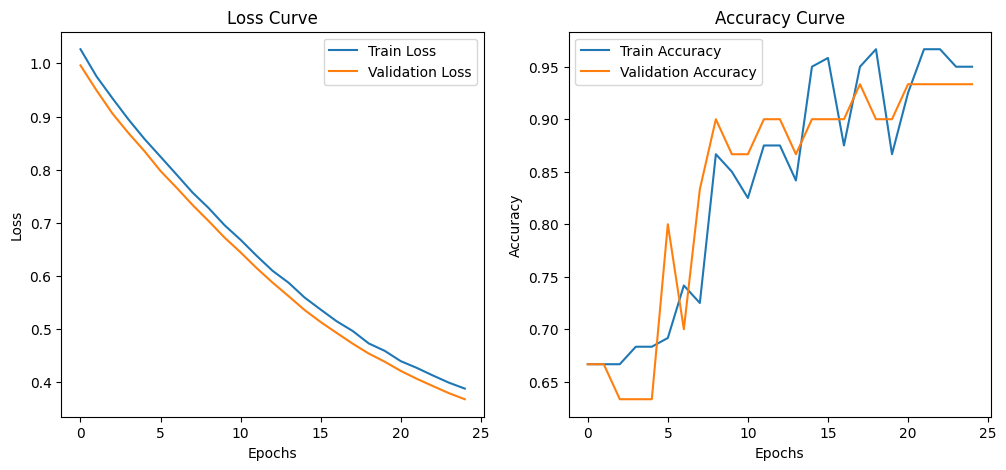

In [19]:
# Plot Training History 
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.show()

In [20]:
# -------------------------- Make Predictions --------------------------
predictions = model.predict(test_X)  # Get softmax probabilities
predicted_classes = np.argmax(predictions, axis=1)  # Convert probabilities to class labels
true_classes = np.argmax(test_y, axis=1)  # Get actual class labels

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


In [21]:
# -------------------------- Show Sample Predictions --------------------------
sample_indices = np.random.choice(len(test_X), 5, replace=False)  # Pick 5 random test samples

print("\nSample Predictions:")
for i, idx in enumerate(sample_indices):
    print(f"Sample {i+1}: True Label: {label_encoder.inverse_transform([true_classes[idx]])[0]} | "
          f"Predicted: {label_encoder.inverse_transform([predicted_classes[idx]])[0]} | "
          f"Confidence: {np.max(predictions[idx]):.2%}")


Sample Predictions:
Sample 1: True Label: Iris-setosa | Predicted: Iris-setosa | Confidence: 88.36%
Sample 2: True Label: Iris-versicolor | Predicted: Iris-versicolor | Confidence: 58.00%
Sample 3: True Label: Iris-versicolor | Predicted: Iris-versicolor | Confidence: 60.54%
Sample 4: True Label: Iris-virginica | Predicted: Iris-virginica | Confidence: 56.36%
Sample 5: True Label: Iris-virginica | Predicted: Iris-virginica | Confidence: 58.61%


In [22]:
# -------------------------- Confusion Matrix & Classification Report --------------------------
from sklearn.metrics import classification_report, confusion_matrix

# Generate classification report
print("\n Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=label_encoder.classes_))


 Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.80      0.89        10
 Iris-virginica       0.83      1.00      0.91        10

       accuracy                           0.93        30
      macro avg       0.94      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30



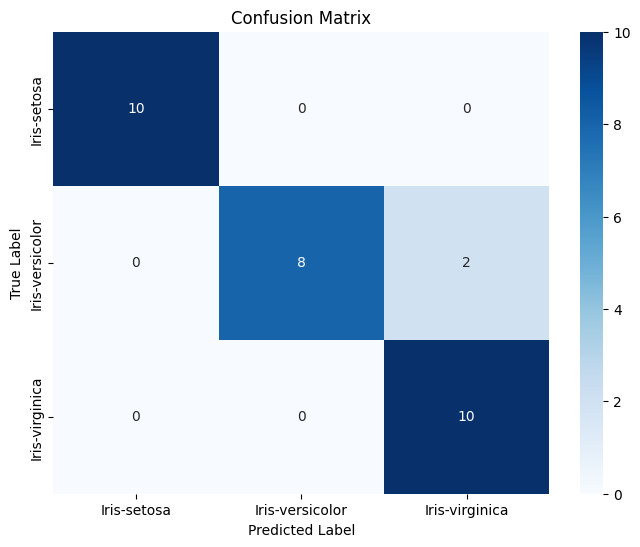

In [23]:
# -------------------------- Plot Confusion Matrix --------------------------
conf_matrix = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()